In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Creacion de la función

In [58]:
def padding(img):
    '''
    Funcion de padding que agrega 1 pixel de border con un color de intensidad intermedio,
    aunque sus efectos son de todos modos despreciables.
    
    <img> Imagen input en GRAYSCALE
    '''
    border_type = cv.BORDER_CONSTANT # Borde constante
    top = 1  # padding superior
    bottom = top # padding inferior
    left = 1  # pedding izquierda
    right = left # padding derecho
    value = [125] # valor para el padding
    dst = cv.copyMakeBorder(img, top, bottom, left, right, border_type, None, value) # aplica el pad
    return dst # devuelve la nueva imagen


def lbp_pixel(i,j,orig_pad):
    '''
    Aplica el algoritmo sobre el pixel i,j de la imagen con padding
    <i,j> Posicion respecto de la imagen original
    <orig_pad> Imagen original con padding, o imagen a aplicar el algoritmo
    '''
    pixel = orig_pad[i+1,j+1] # Toma el valor del pixel central
    window = orig_pad[i:i+3,j:j+3].flatten() # Toma los pixeles dentro del kernel 3x3
    window = np.delete(window,4) # Elimina el elemento 4 (pixel objetivo)
    binary_window = window >= pixel # Mascara de intensidades
    texture_value = np.packbits(binary_window) # Convierte a int el binario de la mascara
    return texture_value # Valor final de la textura


def LBP(img):
    '''
    Aplica el algoritmo LBP sobre la imagen objetivo
    <img> Imagen objetivo para aplicar el algoritmo
    '''
    rows= img.shape[0] # Filas
    columns = img.shape[1] # Columnas
    texture_matrix = np.zeros(img.shape) # Inicializo una matriz para llenar con las texturas
    padded_image = padding(img) # Pad de la imagen
    for i in range(rows):
        for j in range(columns):
            texture_matrix[i,j] = lbp_pixel(i,j,padded_image)
    return texture_matrix

# Aplicaciones

## Ladirllos

In [59]:
l1 = cv.imread('ladrillos1.png')
l1 = cv.cvtColor(l1,cv.COLOR_BGR2GRAY)
l2 = cv.imread('ladrillos2.png')
l2 = cv.cvtColor(l2,cv.COLOR_BGR2GRAY)

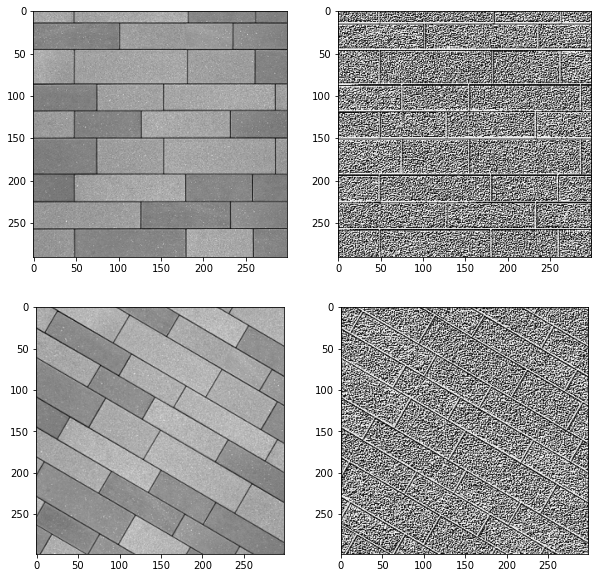

In [64]:
l1_text = LBP(l1)
l2_text = LBP(l2)

f, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0][0].imshow(l1,'gray')
ax[1][0].imshow(l2,'gray')
ax[0][1].imshow(l1_text,'gray')
ax[1][1].imshow(l2_text,'gray')

plt.show()

## Ovejas

In [74]:
oveja1 = cv.imread('oveja1.png',cv.IMREAD_GRAYSCALE)
oveja1_texture = LBP(oveja1)

oveja2 = cv.imread('oveja2.png',cv.IMREAD_GRAYSCALE)
oveja2_texture = LBP(oveja2)

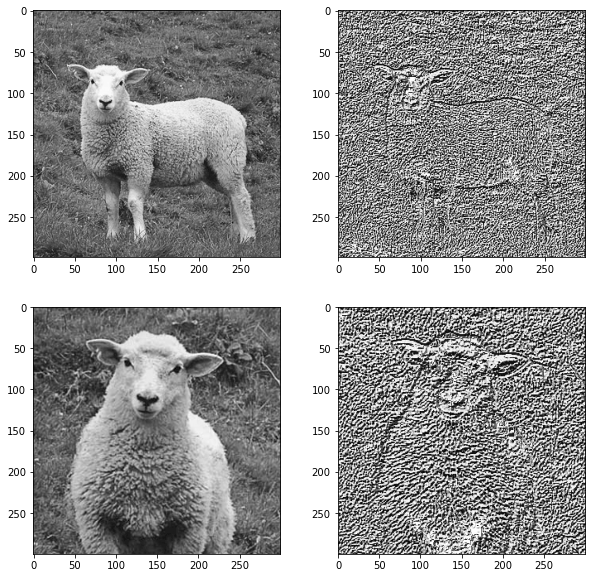

In [75]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0][0].imshow(oveja1,'gray')
ax[1][0].imshow(oveja2,'gray')
ax[0][1].imshow(oveja1_texture,'gray')
ax[1][1].imshow(oveja2_texture,'gray')

plt.show()

## Piedras

In [76]:
piedras1 = cv.imread('piedras1.png',cv.IMREAD_GRAYSCALE)
piedras1_texture = LBP(piedras1)

piedras2 = cv.imread('piedras2.png',cv.IMREAD_GRAYSCALE)
piedras2_texture = LBP(piedras2)

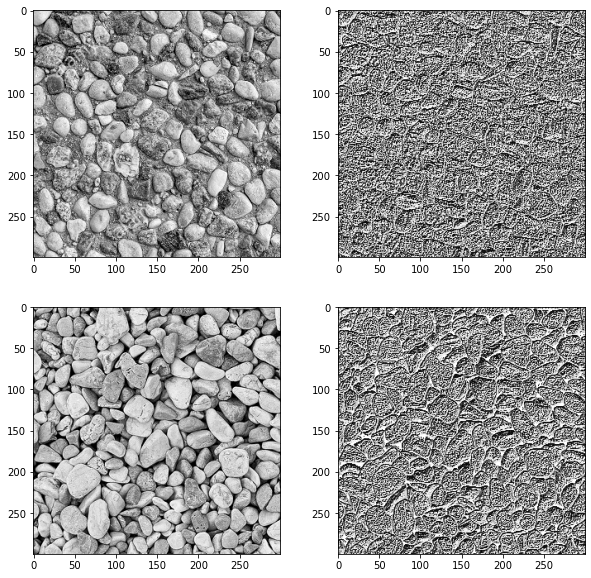

In [77]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0][0].imshow(piedras1,'gray')
ax[1][0].imshow(piedras2,'gray')
ax[0][1].imshow(piedras1_texture,'gray')
ax[1][1].imshow(piedras2_texture,'gray')

plt.show()